爬虫数据使用 12.05 本人爬去珠海 12月小区商品房数据,
其中由于 robots 权限问题，爬虫实现代码、完整数据均不展示

爬虫部分使用 BeautiSoup4 实现

为了使数据集能够适配 matplot.pyplot，将数据集做了适当的预处理

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
print("读取 安居客 二手房数据集")
data_set = pd.read_excel(
    '../dataset/anjuke_extract_data.xlsx'
)
data_set

读取 安居客 二手房数据集


,locate,tag_1,tag_2,tag_3,tag_4,time,green,developer,owner,business
0,高新区 - 唐家湾 - 金唐路333号,户型丰富,NaN,NaN,NaN,2002年,30%(一般),和记黄埔地产（珠海）有限公司,和记物业,唐家湾
1,高新区 - 唐家湾 - 唐淇路1288号,大户型居多,户型丰富,绿化好,总价高,2010年,40%(高),珠海远大置业有限公司,珠海海湾物业管理有限责任公司,唐家湾
2,斗门 - 井岸 - 珠峰大道1399号,户型丰富,NaN,NaN,NaN,2015年,35%(一般),珠海市斗门区世荣实业有限公司,珠海世荣物业管理服务有限公司,井岸
3,香洲 - 梅华 - 梅华西路889号,户型丰富,总价高,配套齐全,NaN,2011年,36%(一般),珠海市恒晟房地产开发有限公司,恒晟房地产开发有限公司,梅华
4,香洲 - 上冲 - 云峰路99号,小户型居多,户型丰富,次新小区,配套齐全,2017年,35%(一般),华发股份集团房地产开发有限公司,珠海华发物业管理服务有限公司,"新香洲,上冲"
...,...,...,...,...,...,...,...,...,...,...
2120,NaN,小户型居多,总价低,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2121,NaN,总价低,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2122,"香洲 - 凤凰北 - 胡湾里一街,胡湾里二街,胡湾里三街",老小区,配套齐全,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2123,NaN,小户型居多,总价低,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print("删除所有含有 NaN 的行")
df = data_set
df.fillna(int(-1), inplace = True)

df = df[-df.locate.isin([-1])]
df

删除所有含有 NaN 的行


,locate,tag_1,tag_2,tag_3,tag_4,time,green,developer,owner,business
0,高新区 - 唐家湾 - 金唐路333号,户型丰富,-1,-1,-1,2002年,30%(一般),和记黄埔地产（珠海）有限公司,和记物业,唐家湾
1,高新区 - 唐家湾 - 唐淇路1288号,大户型居多,户型丰富,绿化好,总价高,2010年,40%(高),珠海远大置业有限公司,珠海海湾物业管理有限责任公司,唐家湾
2,斗门 - 井岸 - 珠峰大道1399号,户型丰富,-1,-1,-1,2015年,35%(一般),珠海市斗门区世荣实业有限公司,珠海世荣物业管理服务有限公司,井岸
3,香洲 - 梅华 - 梅华西路889号,户型丰富,总价高,配套齐全,-1,2011年,36%(一般),珠海市恒晟房地产开发有限公司,恒晟房地产开发有限公司,梅华
4,香洲 - 上冲 - 云峰路99号,小户型居多,户型丰富,次新小区,配套齐全,2017年,35%(一般),华发股份集团房地产开发有限公司,珠海华发物业管理服务有限公司,"新香洲,上冲"
...,...,...,...,...,...,...,...,...,...,...
2116,香洲 - 老香洲 - 光明街,老小区,配套齐全,-1,-1,-1,-1,-1,-1,-1
2117,横琴 - 横琴口岸 - 濠江路8号,大户型居多,户型丰富,别墅,次新小区,-1,-1,-1,-1,-1
2119,香洲 - 老香洲 - 光明街,老小区,配套齐全,-1,-1,-1,-1,-1,-1,-1
2122,"香洲 - 凤凰北 - 胡湾里一街,胡湾里二街,胡湾里三街",老小区,配套齐全,-1,-1,-1,-1,-1,-1,-1


In [7]:
print("提取出 ThemeRiver_1 所用到的数据")
feature = df[['tag_1',
              'tag_2',
              'tag_3',
              'tag_4',
              'time'
              ]]
feature

提取出 ThemeRiver_1 所用到的数据


,tag_1,tag_2,tag_3,tag_4,time
0,户型丰富,-1,-1,-1,2002年
1,大户型居多,户型丰富,绿化好,总价高,2010年
2,户型丰富,-1,-1,-1,2015年
3,户型丰富,总价高,配套齐全,-1,2011年
4,小户型居多,户型丰富,次新小区,配套齐全,2017年
...,...,...,...,...,...
2116,老小区,配套齐全,-1,-1,-1
2117,大户型居多,户型丰富,别墅,次新小区,-1
2119,老小区,配套齐全,-1,-1,-1
2122,老小区,配套齐全,-1,-1,-1


In [8]:
print("检查一下年份数据的可信度")
count = 0
for i in feature.time:
    if i == -1:
        count += 1
print("我们有", count, "/2023 年份缺失， 可以丢弃")

检查一下年份数据的可信度
我们有 23 /2023 年份缺失， 可以丢弃


In [9]:
feature = feature[-feature.time.isin([-1])]
feature
print("应该是正好有 2000 条年份数据")

应该是正好有 2000 条年份数据


In [10]:
print("将 time 中年份 str 转化为 int，并根据这个排序")
for item in feature.time:
    count = 0
    feature.replace(item, item[0: 4], inplace=True)
    """
    for char in item:
        print(count, ":", ord(char), ":", char)
    break
    """
feature

将 time 中年份 str 转化为 int，并根据这个排序


/Users/charminzh/.conda/envs/dataVisualization/lib/python3.9/site-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,tag_1,tag_2,tag_3,tag_4,time
0,户型丰富,-1,-1,-1,2002
1,大户型居多,户型丰富,绿化好,总价高,2010
2,户型丰富,-1,-1,-1,2015
3,户型丰富,总价高,配套齐全,-1,2011
4,小户型居多,户型丰富,次新小区,配套齐全,2017
...,...,...,...,...,...
2092,小户型居多,老小区,总价低,配套齐全,1995
2094,小户型居多,配套齐全,-1,-1,2004
2095,小户型居多,老小区,总价低,配套齐全,1995
2096,户型丰富,总价高,-1,-1,2012


In [11]:
set_year = set([])
for item in feature.time:
    set_year.add(item)
print(set_year)

s2list_year = list(set_year)
s2list_year.sort()
print(s2list_year)

{'2006', '2021', '1998', '1984', '2022', '1996', '2011', '2010', '1990', '2001', '1997', '2019', '2018', '2009', '2017', '2013', '1994', '1989', '2015', '2014', '2012', '2016', '2020', '1999', '2005', '2004', '2023', '2003', '2008', '2002', '2000', '1993', '1992', '1995', '2024', '2007'}
['1984', '1989', '1990', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']


In [12]:
year_list = []
for item in feature.time:
    year_list.append(item)
year_list.sort()
print(year_list)
feature.index = feature['time']
sort_feature = feature.loc[s2list_year]
#print(sort_feature)
sort_feature

['1984', '1984', '1989', '1989', '1989', '1989', '1990', '1990', '1990', '1990', '1990', '1990', '1990', '1990', '1992', '1992', '1992', '1992', '1992', '1992', '1992', '1992', '1992', '1992', '1992', '1992', '1992', '1992', '1992', '1992', '1993', '1993', '1993', '1993', '1993', '1993', '1993', '1993', '1993', '1993', '1993', '1993', '1993', '1993', '1993', '1993', '1993', '1993', '1993', '1993', '1993', '1993', '1994', '1994', '1994', '1994', '1994', '1994', '1994', '1994', '1994', '1994', '1994', '1994', '1994', '1994', '1994', '1994', '1994', '1994', '1994', '1994', '1994', '1994', '1994', '1994', '1994', '1994', '1994', '1994', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1996', '1996',

,tag_1,tag_2,tag_3,tag_4,time
time,,,,,
1984,小户型居多,老小区,配套齐全,-1,1984
1984,小户型居多,老小区,配套齐全,-1,1984
1989,小户型居多,老小区,总价高,配套齐全,1989
1989,小户型居多,老小区,总价高,配套齐全,1989
1989,小户型居多,老小区,配套齐全,-1,1989
...,...,...,...,...,...
2023,次新小区,配套齐全,-1,-1,2023
2023,小户型居多,户型丰富,次新小区,总价低,2023
2023,小户型居多,户型丰富,次新小区,总价低,2023


观察到有较多重复数据，不进行清洗了，因为重复不规律，应该不是爬取的原因。

In [13]:
set_feat = set([])
for item in feature.tag_1:
    set_feat.add(item)
for item in feature.tag_2:
    set_feat.add(item)
for item in feature.tag_3:
    set_feat.add(item)
for item in feature.tag_4:
    set_feat.add(item)
print("共有", len(set_feat), "种属性")
print(set_feat)
len(year_list)

共有 11 种属性
{'总价低', '配套齐全', '小户型居多', '别墅', '次新小区', '总价高', '绿化好', '大户型居多', '户型丰富', '老小区', -1}


2000

In [14]:
# s2list_year
len(year_list)
fengfu = [0] * 2000
dahu = [0] * 2000
lao = [0] * 2000
high = [0] * 2000
cixin = [0] * 2000
bieshu = [0] * 2000
low = [0] * 2000
green = [0] * 2000
xiaohu = [0] * 2000
peitao = [0] * 2000

count = 0
for item in sort_feature.tag_1:
    if item == '户型丰富':
        fengfu[count] += 1
    elif item == '大户型居多':
        dahu[count] += 1
    elif item == '老小区':
        lao[count] += 1
    elif item == '总价高':
        high[count] += 1
    elif item == '次新小区':
        cixin[count] += 1
    elif item == '别墅':
        bieshu[count] += 1
    elif item == '总价低':
        low[count] += 1
    elif item == '绿化好':
        green[count] += 1
    elif item == '小户型居多':
        xiaohu[count] += 1
    elif item == '配套齐全':
        peitao[count] += 1
    count += 1

count = 0
for item in sort_feature.tag_2:
    if item == '户型丰富':
        fengfu[count] += 1
    elif item == '大户型居多':
        dahu[count] += 1
    elif item == '老小区':
        lao[count] += 1
    elif item == '总价高':
        high[count] += 1
    elif item == '次新小区':
        cixin[count] += 1
    elif item == '别墅':
        bieshu[count] += 1
    elif item == '总价低':
        low[count] += 1
    elif item == '绿化好':
        green[count] += 1
    elif item == '小户型居多':
        xiaohu[count] += 1
    elif item == '配套齐全':
        peitao[count] += 1
    count += 1

count = 0
for item in sort_feature.tag_3:
    if item == '户型丰富':
        fengfu[count] += 1
    elif item == '大户型居多':
        dahu[count] += 1
    elif item == '老小区':
        lao[count] += 1
    elif item == '总价高':
        high[count] += 1
    elif item == '次新小区':
        cixin[count] += 1
    elif item == '别墅':
        bieshu[count] += 1
    elif item == '总价低':
        low[count] += 1
    elif item == '绿化好':
        green[count] += 1
    elif item == '小户型居多':
        xiaohu[count] += 1
    elif item == '配套齐全':
        peitao[count] += 1
    count += 1

count = 0
for item in sort_feature.tag_4:
    if item == '户型丰富':
        fengfu[count] += 1
    elif item == '大户型居多':
        dahu[count] += 1
    elif item == '老小区':
        lao[count] += 1
    elif item == '总价高':
        high[count] += 1
    elif item == '次新小区':
        cixin[count] += 1
    elif item == '别墅':
        bieshu[count] += 1
    elif item == '总价低':
        low[count] += 1
    elif item == '绿化好':
        green[count] += 1
    elif item == '小户型居多':
        xiaohu[count] += 1
    elif item == '配套齐全':
        peitao[count] += 1
    count += 1

fine = {
    "年份" : year_list,
    "户型丰富" : fengfu,
    "大户型居多" : dahu,
    "老小区" : lao,
    "总价高" : high,
    "次新小区" : cixin,
    "别墅" : bieshu,
    "总价低" : low,
    "绿化好" : green,
    "小户型居多" : xiaohu,
    "配套齐全" : peitao
}
fine = pd.DataFrame(fine)
fine

,年份,户型丰富,大户型居多,老小区,总价高,次新小区,别墅,总价低,绿化好,小户型居多,配套齐全
0,1984,0,0,1,0,0,0,0,0,1,1
1,1984,0,0,1,0,0,0,0,0,1,1
2,1989,0,0,1,1,0,0,0,0,1,1
3,1989,0,0,1,1,0,0,0,0,1,1
4,1989,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,2023,0,0,0,0,1,0,0,0,0,1
1996,2023,1,0,0,0,1,0,1,0,1,0
1997,2023,1,0,0,0,1,0,1,0,1,0
1998,2024,0,0,0,0,1,0,0,0,0,1


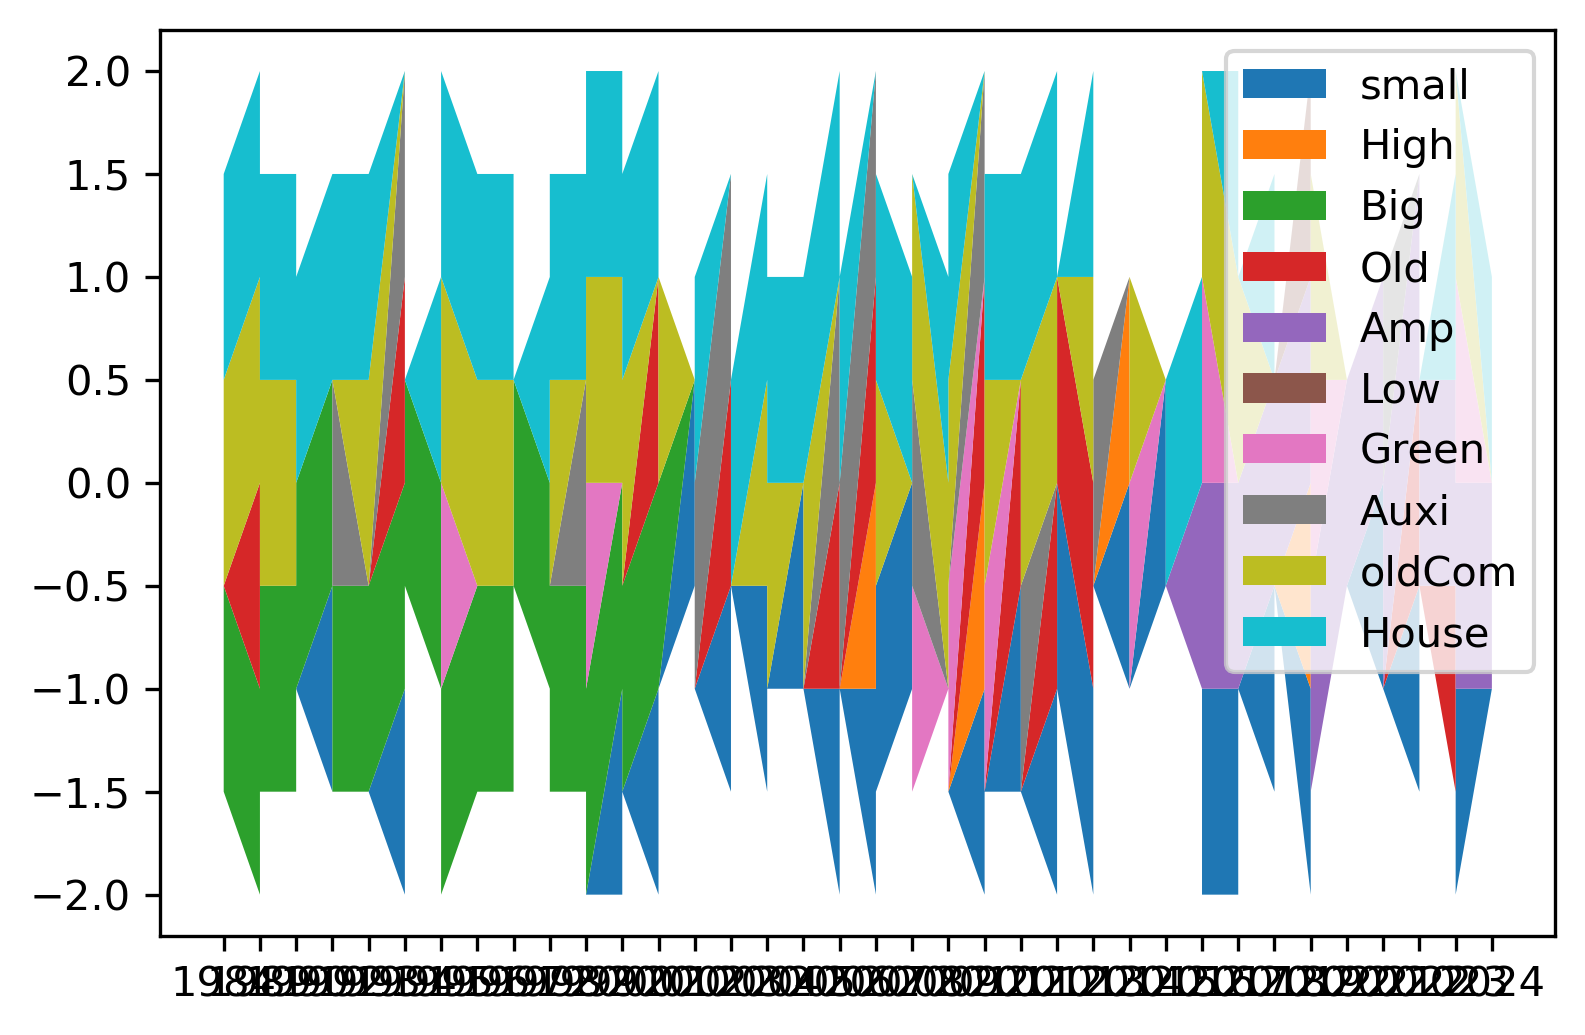

In [29]:
plt.figure(dpi=300, )
feat_str = []
for item in set_feat:
    feat_str.append(str(item))

plt.stackplot(year_list,
              fengfu,
              dahu,
              lao,
              high,
              cixin,
              bieshu,
              low,
              green,
              xiaohu,
              peitao,
              baseline='sym',
              labels={'Amp',
                      'Big',
                      'Old',
                      'High',
                      'oldCom',
                      'House',
                      'Low',
                      'Green',
                      'small',
                      'Auxi'}
              )
plt.legend(loc='best')
plt.savefig('result/themeRiver.png')

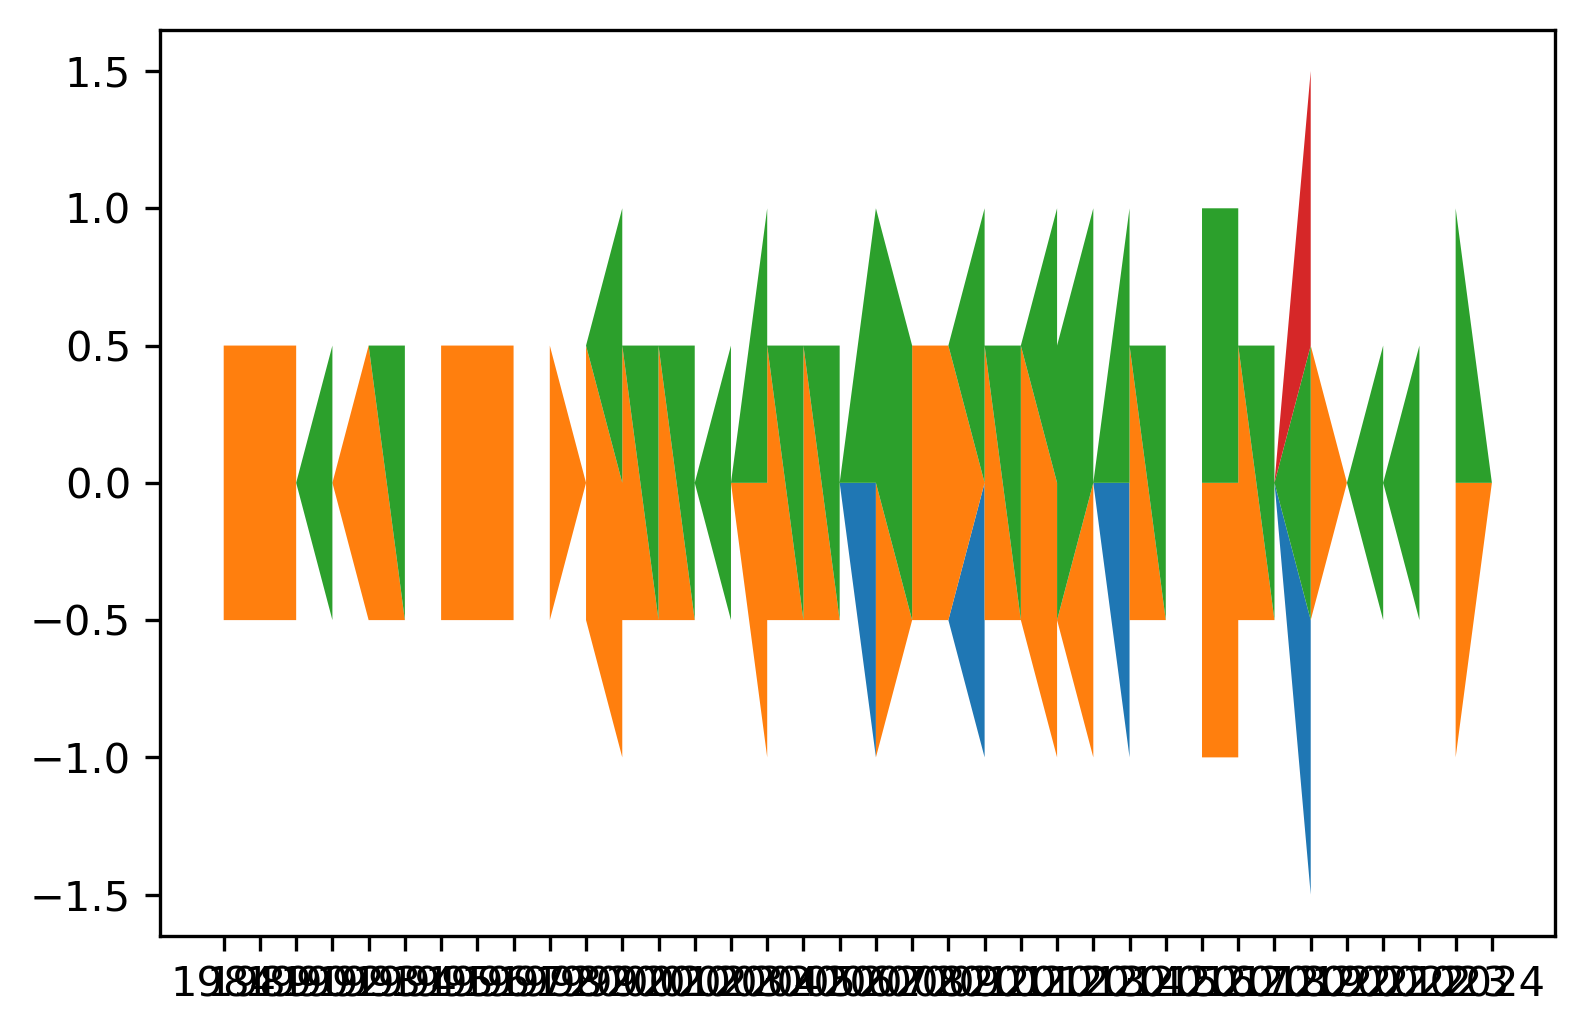

In [35]:


plt.figure(dpi=300, )
feat_str = []
for item in set_feat:
    feat_str.append(str(item))
plt.stackplot(year_list,
              dahu,
              xiaohu,
              fengfu,
              bieshu,
              baseline='sym',
              )